In [1]:
!nvidia-smi

Sat Sep 12 19:36:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 452.06       Driver Version: 452.06       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208... WDDM  | 00000000:01:00.0  On |                  N/A |
| 23%   59C    P0    55W / 300W |   1629MiB / 11264MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [2]:
%cd "D:/Github/PyDeN/"

D:\Github\PyDeN


In [3]:
from DeNN.custom_model import Adv_conv
from DeNN.dataset_loader import data_loader, data_augmentation
from DeNN.trainer import trainer

In [4]:
import torch,torchvision
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [5]:
DATA_PATH = 'data/'
BATCH_SIZE =128

In [6]:
my_transformations = data_augmentation.DataAugmentationCifar10()
train, test = data_loader.DatasetCifar10(data_path = DATA_PATH,transformations = my_transformations,batch_size = BATCH_SIZE).load_data()

Files already downloaded and verified
Files already downloaded and verified


In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 bird   dog  frog  bird


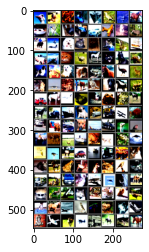

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Adv_conv().to(device)
summary(model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,928
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,928
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 32, 34, 34]           2,080
        MaxPool2d-14           [-1, 32,

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [11]:
trainer = trainer.Trainer( model =model , optimizer =optimizer , device =device , train_loader = train, test_loader = test,epochs = 15,criteria = criterion)

In [12]:
(w,x),(y,z) = trainer.train()

loss=2.2684988975524902 batch_id=390 Accuracy = 0.1397: 100%|████████████████████████| 391/391 [00:10<00:00, 39.09it/s]
loss=2.221715211868286 batch_id=6 Accuracy = 0.00386:   1%|▎                           | 4/391 [00:00<00:10, 37.88it/s]


Test set: Average loss: 0.0176, Accuracy: 2140/10000 (21.40%)



loss=2.0233864784240723 batch_id=390 Accuracy = 0.23878: 100%|███████████████████████| 391/391 [00:09<00:00, 39.16it/s]
loss=1.9310203790664673 batch_id=6 Accuracy = 0.00484:   1%|▎                          | 4/391 [00:00<00:10, 35.82it/s]


Test set: Average loss: 0.0157, Accuracy: 2913/10000 (29.13%)



loss=2.025808334350586 batch_id=390 Accuracy = 0.28564: 100%|████████████████████████| 391/391 [00:10<00:00, 38.98it/s]
loss=1.8127187490463257 batch_id=5 Accuracy = 0.00458:   1%|▎                          | 4/391 [00:00<00:09, 38.71it/s]


Test set: Average loss: 0.0147, Accuracy: 3272/10000 (32.72%)



loss=1.894565224647522 batch_id=390 Accuracy = 0.32494: 100%|████████████████████████| 391/391 [00:10<00:00, 39.01it/s]
loss=1.734853982925415 batch_id=6 Accuracy = 0.00658:   1%|▎                           | 4/391 [00:00<00:10, 36.97it/s]


Test set: Average loss: 0.0136, Accuracy: 3679/10000 (36.79%)



loss=1.7471344470977783 batch_id=390 Accuracy = 0.3541: 100%|████████████████████████| 391/391 [00:10<00:00, 39.06it/s]
loss=1.519079566001892 batch_id=6 Accuracy = 0.00726:   1%|▎                           | 4/391 [00:00<00:10, 36.79it/s]


Test set: Average loss: 0.0129, Accuracy: 4051/10000 (40.51%)



loss=1.5784862041473389 batch_id=390 Accuracy = 0.37624: 100%|███████████████████████| 391/391 [00:10<00:00, 39.05it/s]
loss=1.5381503105163574 batch_id=5 Accuracy = 0.0063:   1%|▎                           | 4/391 [00:00<00:10, 36.81it/s]


Test set: Average loss: 0.0124, Accuracy: 4305/10000 (43.05%)



loss=1.7068557739257812 batch_id=390 Accuracy = 0.39444: 100%|███████████████████████| 391/391 [00:10<00:00, 39.07it/s]
loss=1.5534136295318604 batch_id=4 Accuracy = 0.005:   1%|▎                            | 4/391 [00:00<00:13, 29.71it/s]


Test set: Average loss: 0.0122, Accuracy: 4390/10000 (43.90%)



loss=1.5277413129806519 batch_id=390 Accuracy = 0.41074: 100%|███████████████████████| 391/391 [00:10<00:00, 39.00it/s]
loss=1.5548005104064941 batch_id=6 Accuracy = 0.00738:   1%|▎                          | 4/391 [00:00<00:11, 35.18it/s]


Test set: Average loss: 0.0119, Accuracy: 4564/10000 (45.64%)



loss=1.5866668224334717 batch_id=390 Accuracy = 0.427: 100%|█████████████████████████| 391/391 [00:10<00:00, 39.05it/s]
loss=1.5303387641906738 batch_id=5 Accuracy = 0.0066:   1%|▎                           | 4/391 [00:00<00:10, 35.21it/s]


Test set: Average loss: 0.0116, Accuracy: 4693/10000 (46.93%)



loss=1.5072190761566162 batch_id=390 Accuracy = 0.4377: 100%|████████████████████████| 391/391 [00:10<00:00, 39.04it/s]
loss=1.4982830286026 batch_id=6 Accuracy = 0.00784:   1%|▎                             | 4/391 [00:00<00:09, 39.32it/s]


Test set: Average loss: 0.0112, Accuracy: 4858/10000 (48.58%)



loss=1.4807846546173096 batch_id=390 Accuracy = 0.44686: 100%|███████████████████████| 391/391 [00:09<00:00, 39.14it/s]
loss=1.506931185722351 batch_id=5 Accuracy = 0.00694:   1%|▎                           | 4/391 [00:00<00:10, 38.11it/s]


Test set: Average loss: 0.0112, Accuracy: 4909/10000 (49.09%)



loss=1.538222074508667 batch_id=390 Accuracy = 0.45664: 100%|████████████████████████| 391/391 [00:09<00:00, 39.13it/s]
loss=1.4151573181152344 batch_id=6 Accuracy = 0.00852:   1%|▎                          | 4/391 [00:00<00:10, 37.77it/s]


Test set: Average loss: 0.0110, Accuracy: 4985/10000 (49.85%)



loss=1.3384853601455688 batch_id=390 Accuracy = 0.46642: 100%|███████████████████████| 391/391 [00:09<00:00, 39.18it/s]
loss=1.4986424446105957 batch_id=6 Accuracy = 0.00846:   1%|▎                          | 4/391 [00:00<00:09, 38.87it/s]


Test set: Average loss: 0.0108, Accuracy: 5131/10000 (51.31%)



loss=1.4348942041397095 batch_id=390 Accuracy = 0.47676: 100%|███████████████████████| 391/391 [00:09<00:00, 39.17it/s]
loss=1.3855805397033691 batch_id=6 Accuracy = 0.00836:   1%|▎                          | 4/391 [00:00<00:10, 38.59it/s]


Test set: Average loss: 0.0106, Accuracy: 5138/10000 (51.38%)



loss=1.542815923690796 batch_id=390 Accuracy = 0.48494: 100%|████████████████████████| 391/391 [00:09<00:00, 39.14it/s]



Test set: Average loss: 0.0104, Accuracy: 5307/10000 (53.07%)

